Esse programa usa a estratégia "Double Death Cross" para operar no mercado de ações.  
"Doube Death Cross" é uma estratégia de cruzamento de médias móveis que usa duas médias móveis exponenciais (EMA) de diferentes períodos para determinar a direção da tendência e gerar sinais de compra ou venda.

In [2]:
# Importar as bibliotecas
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
# Definir o dia de hoje em uma variável
hoje = pd.Timestamp.today().strftime('%Y-%m-%d')

# Obter os dados do mercado
dados = yf.download('BTC-USD', start='2017-01-01', end=hoje)
dados.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [8]:
dados.shape

(2376, 6)

In [9]:
# Computar a média móvel de 50 dias (MM50) e a média móvel de 200 dias (MM200)
dados['MM50'] = dados['Close'].rolling(50).mean()
dados['MM200'] = dados['Close'].rolling(200).mean()

In [10]:
dados.tail()

,Open,High,Low,Close,Adj Close,Volume,MM50,MM200
Date,,,,,,,,
2023-06-30,30441.353516,31256.863281,29600.275391,30477.251953,30477.251953,26387306197,27477.575391,24653.249482
2023-07-01,30471.847656,30641.289062,30328.865234,30590.078125,30590.078125,9086606733,27553.277148,24717.293281
2023-07-02,30587.269531,30766.140625,30264.019531,30620.769531,30620.769531,10533418042,27630.010977,24781.318877
2023-07-03,30624.515625,31375.613281,30586.513672,31156.439453,31156.439453,15271884873,27714.526992,24850.276748
2023-07-04,31156.865234,31325.197266,30659.355469,30777.582031,30777.582031,12810828427,27786.224766,24920.927236


In [11]:
# Computa o sinal de compra e venda

# Criar uma coluna para armazenar os sinais de compra e venda
dados['Sinal'] = 0
# Se a MM50 cruzar abaixo da MM200 e a MM50 anterior cruzar acima da MM200, vender (indicar = -1)
dados.loc[(dados['MM50'] <= dados['MM200']) & (dados['MM50'].shift(1) > dados['MM200'].shift(1)), 'Sinal'] = -1
# Se a MM50 cruzar acima da MM200 e a MM50 anterior cruzar abaixo da MM200, comprar (indicar = 1)
dados.loc[(dados['MM50'] >= dados['MM200']) & (dados['MM50'].shift(1) < dados['MM200'].shift(1)), 'Sinal'] = 1

In [12]:
# Limpar os dados
dados.dropna(inplace=True)
dados.head()

,Open,High,Low,Close,Adj Close,Volume,MM50,MM200,Sinal
Date,,,,,,,,,
2017-07-19,2323.080078,2397.169922,2260.229980,2273.429932,2273.429932,1245100032,2534.961602,1562.707278,0
2017-07-20,2269.889893,2900.699951,2269.889893,2817.600098,2817.600098,2249260032,2545.585405,1571.803654,0
2017-07-21,2838.409912,2838.409912,2621.850098,2667.760010,2667.760010,1489449984,2550.783008,1580.033704,0
2017-07-22,2668.629883,2862.419922,2657.709961,2810.120117,2810.120117,1177129984,2557.214409,1588.865104,0
2017-07-23,2808.100098,2832.179932,2653.939941,2730.399902,2730.399902,1072840000,2561.515405,1596.743454,0


In [13]:
dados.tail()

,Open,High,Low,Close,Adj Close,Volume,MM50,MM200,Sinal
Date,,,,,,,,,
2023-06-30,30441.353516,31256.863281,29600.275391,30477.251953,30477.251953,26387306197,27477.575391,24653.249482,0
2023-07-01,30471.847656,30641.289062,30328.865234,30590.078125,30590.078125,9086606733,27553.277148,24717.293281,0
2023-07-02,30587.269531,30766.140625,30264.019531,30620.769531,30620.769531,10533418042,27630.010977,24781.318877,0
2023-07-03,30624.515625,31375.613281,30586.513672,31156.439453,31156.439453,15271884873,27714.526992,24850.276748,0
2023-07-04,31156.865234,31325.197266,30659.355469,30777.582031,30777.582031,12810828427,27786.224766,24920.927236,0


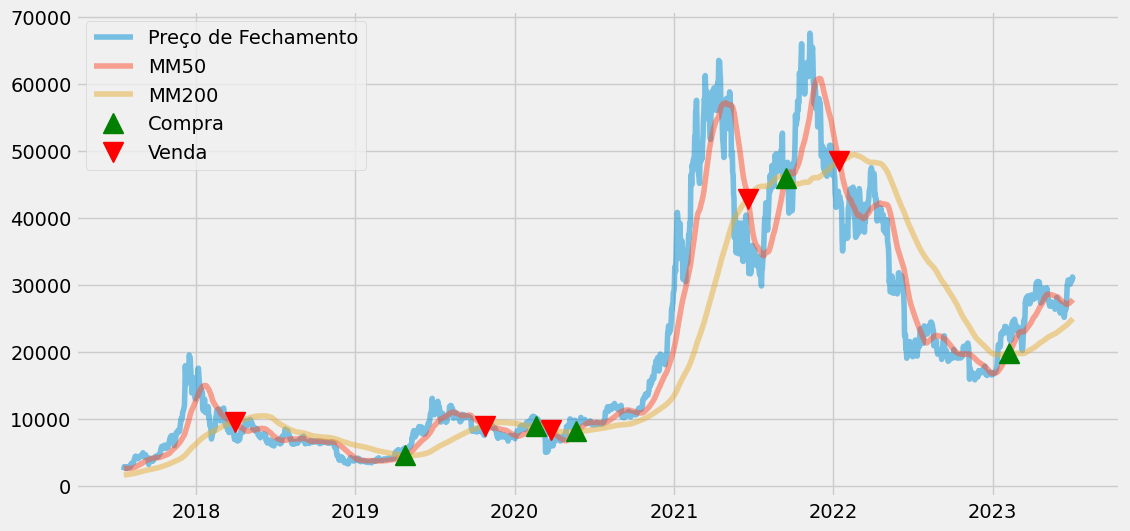

In [14]:
# Visualizar os dados
plt.figure(figsize=(12, 6))
plt.plot(dados['Close'], label='Preço de Fechamento', alpha=0.5)
plt.plot(dados['MM50'], label='MM50', alpha=0.5)
plt.plot(dados['MM200'], label='MM200', alpha=0.5)

# Visualizar os sinais de compra e venda
plt.plot(dados.loc[dados['Sinal'] == 1].index, dados['MM50'][dados['Sinal'] == 1], '^', markersize=15, color='g', label='Compra')
plt.plot(dados.loc[dados['Sinal'] == -1].index, dados['MM50'][dados['Sinal'] == -1], 'v', markersize=15, color='r', label='Venda')
plt.legend()
plt.show()